# Je t’ai créé un second fichier, avec une modification de la classe d’âge concernant 166 qui bascule dans les 5-12 ans (initialement sup 12 ans). Fichier : Egypte_period_prediction_V2.csv


### Prédire La période temporelle en utilsant 17 labels

##### Pre-process the data

In [1]:
# import des bibliothèques Python utiles:
import numpy as np
import matplotlib.pyplot as plt
import random
# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import pandas as pd
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =10,5

In [2]:
dataEgypt_17 = pd.read_csv("Egypte_period_prediction_V2.csv", sep=';',decimal=',')

In [3]:
dataEgypt_17

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Nb_Ornement,orn_Porte,orn_Nonporte,Coquillage,Aspatharia_unio,Perles,Fard,Outils,Prosterne,Decoupe
0,399,South sector,IIIA2-IIID,1_5,Assis,NO,sol,Jambes,3,0,...,0,0,0,0,0,0,0,0,0,0
1,409,IIID/3e dyn,IIID/3e dyn,1_5,Assis,S,NO,tete,2,0,...,0,0,0,0,0,0,1,0,0,0
2,448,South sector,IIIA2,1_5,G,SE,S,tete,1,0,...,0,0,0,0,0,0,1,0,0,0
3,455,IIID/3e dyn,IIID/3e dyn,1_5,D,E,NO,tete,3,1,...,0,0,0,0,0,0,0,0,0,0
4,457,IIID/3e dyn,IIID/3e dyn,1_5,Dos,SO,ciel,asymetrique_jambe_thorax,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,985,3e dyn,3e dyn,sup 12,G,NO,Sol,asymetrique_jambe_thorax,4,1,...,1,1,0,0,0,0,0,0,0,0
311,994,IIID/3e dyn,IIID/3e dyn,sup 12,G,N,Sol,asymetrique_jambe_thorax,3,1,...,0,0,0,0,0,0,0,0,0,0
312,997,3e dyn,3e dyn,sup 12,D,E,Sol,Jambes,1,0,...,0,0,0,0,0,0,0,0,0,0
313,998,3e dyn,3e dyn,sup 12,G,N,NE,tete,3,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataEgypt_17.period_17_labels.value_counts()

IIIA1-A2       62
IIIA2          61
IIID/3e dyn    60
IIIA1          49
3e dyn         22
IID-IIIA1      15
IID            14
IID-IIIA2      12
IIIA2-IIIC      4
IIID            3
IIIA2-IIID      3
IIIC            2
IIC-IIIA1       2
IIIC/IIID       2
IIC-IID         2
IIIB            1
IIC             1
Name: period_17_labels, dtype: int64

### Data encoding

In [6]:
Cols_=['classe_age','Position_corps','Orientation_tete','Orientation_Face','Position_mains']

In [7]:
from sklearn.preprocessing import OneHotEncoder

def encoding_data(dataframe, cols):
    

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')


    #perform one-hot encoding on 'the following' columns 

    encoder_df = pd.DataFrame(encoder.fit_transform(dataframe[cols]).toarray())

    encoder_df.columns = encoder.get_feature_names(cols)


    #merge one-hot encoded columns back with original DataFrame
    data_encoded = dataframe.join(encoder_df)
    
    return data_encoded

In [8]:
data_encoded_Egypt_17=encoding_data(dataEgypt_17, Cols_)

/Users/chahrazedlabba/miniforge3/envs/IEEEtlt/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
data_encoded_Egypt_17.head()

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,399,South sector,IIIA2-IIID,1_5,Assis,NO,sol,Jambes,3,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,409,IIID/3e dyn,IIID/3e dyn,1_5,Assis,S,NO,tete,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,448,South sector,IIIA2,1_5,G,SE,S,tete,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,455,IIID/3e dyn,IIID/3e dyn,1_5,D,E,NO,tete,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,457,IIID/3e dyn,IIID/3e dyn,1_5,Dos,SO,ciel,asymetrique_jambe_thorax,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
data_encoded_Egypt_17.columns.values.tolist()

['Sepult',
 'Periode_5_label',
 'period_17_labels',
 'classe_age',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Or

In [11]:
cols_to_norm=['Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [12]:
#normalize the data before start working with it
#for that we will use the StandardScaler normalizer de from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data_encoded_Egypt_17[cols_to_norm] = MinMaxScaler().fit_transform(data_encoded_Egypt_17[cols_to_norm])

In [13]:
data_encoded_Egypt_17.head()

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,399,South sector,IIIA2-IIID,1_5,Assis,NO,sol,Jambes,0.2,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,409,IIID/3e dyn,IIID/3e dyn,1_5,Assis,S,NO,tete,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,448,South sector,IIIA2,1_5,G,SE,S,tete,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,455,IIID/3e dyn,IIID/3e dyn,1_5,D,E,NO,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,457,IIID/3e dyn,IIID/3e dyn,1_5,Dos,SO,ciel,asymetrique_jambe_thorax,0.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
data_encoded_Egypt_17['period_17_labels'].replace({'IIID/3e dyn':0, 'IIIA1-A2':1,'IIIA2':2,
                                                      'IIIA1':3,'3e dyn':4,'IID-IIIA1':5,'IID':6, 'IID-IIIA2':7,
                                                     'IIIA2-IIIC':8,'IIID':9,'IIIA2-IIID':10,
                                                     'IIIC':11,'IIIC/IIID':12,'IIC-IID':13,
                                                     'IIC-IIIA1':14,'IIC':15,'IIIB':16}, inplace=True)

## Cross Validation Using Leave one Out method

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score

In [17]:
cols_features= ['period_17_labels',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [18]:
data_=data_encoded_Egypt_17[cols_features]
# Separate the target variable and the features
X = data_.drop('period_17_labels', axis=1)
y = data_['period_17_labels']

## Random Forest Train and Test : Leave One Out

In [19]:
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_RF=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    clf=RandomForestClassifier(n_estimators= 400,max_depth=10,min_samples_split=2,min_samples_leaf=1, random_state=42)
    clf.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(clf.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=clf.predict(X_test).tolist()
    Df_predictions_RF=pd.concat([Df_predictions_RF,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [10]
Fold 2 - Prediction: [1], Actual: [0]
Fold 3 - Prediction: [1], Actual: [2]
Fold 4 - Prediction: [0], Actual: [0]
Fold 5 - Prediction: [1], Actual: [0]
Fold 6 - Prediction: [2], Actual: [0]
Fold 7 - Prediction: [0], Actual: [0]
Fold 8 - Prediction: [3], Actual: [0]
Fold 9 - Prediction: [1], Actual: [2]
Fold 10 - Prediction: [2], Actual: [2]
Fold 11 - Prediction: [3], Actual: [1]
Fold 12 - Prediction: [2], Actual: [2]
Fold 13 - Prediction: [2], Actual: [5]
Fold 14 - Prediction: [1], Actual: [16]
Fold 15 - Prediction: [3], Actual: [2]
Fold 16 - Prediction: [3], Actual: [1]
Fold 17 - Prediction: [2], Actual: [2]
Fold 18 - Prediction: [1], Actual: [2]
Fold 19 - Prediction: [1], Actual: [14]
Fold 20 - Prediction: [2], Actual: [2]
Fold 21 - Prediction: [2], Actual: [2]
Fold 22 - Prediction: [2], Actual: [7]
Fold 23 - Prediction: [0], Actual: [3]
Fold 24 - Prediction: [2], Actual: [2]
Fold 25 - Prediction: [1], Actual: [2]
Fold 26 - Prediction: [3], Actu

In [20]:
accuracy = accuracy_score(Df_predictions_RF['period_17_labels'], Df_predictions_RF['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_RF.loc[Df_predictions_RF['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    if (len(df)>0):  
        acc=(len(df_p)/len(df))*100
    else : 
        acc=0
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 35.23809523809524
for the class label  {0}
Acuracy is  {68.33333333333333}
for the class label  {1}
Acuracy is  {45.16129032258064}
for the class label  {2}
Acuracy is  {39.34426229508197}
for the class label  {3}
Acuracy is  {24.489795918367346}
for the class label  {4}
Acuracy is  {18.181818181818183}
for the class label  {5}
Acuracy is  {0.0}
for the class label  {6}
Acuracy is  {14.285714285714285}
for the class label  {7}
Acuracy is  {0.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [22]:
Df_predictions_RF.to_csv('df_results_RF_17_labels_LOO_V2.csv')

## SVM Train and Test : Leave One Out

In [23]:
from sklearn.svm import SVC
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_SVM=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    SVM = SVC(C=100, gamma=0.01,probability=True)
    SVM.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(SVM.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=SVM.predict(X_test).tolist()
    Df_predictions_SVM=pd.concat([Df_predictions_SVM,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [4], Actual: [10]
Fold 2 - Prediction: [3], Actual: [0]
Fold 3 - Prediction: [14], Actual: [2]
Fold 4 - Prediction: [3], Actual: [0]
Fold 5 - Prediction: [0], Actual: [0]
Fold 6 - Prediction: [1], Actual: [0]
Fold 7 - Prediction: [0], Actual: [0]
Fold 8 - Prediction: [10], Actual: [0]
Fold 9 - Prediction: [1], Actual: [2]
Fold 10 - Prediction: [2], Actual: [2]
Fold 11 - Prediction: [3], Actual: [1]
Fold 12 - Prediction: [3], Actual: [2]
Fold 13 - Prediction: [2], Actual: [5]
Fold 14 - Prediction: [2], Actual: [16]
Fold 15 - Prediction: [1], Actual: [2]
Fold 16 - Prediction: [0], Actual: [1]
Fold 17 - Prediction: [3], Actual: [2]
Fold 18 - Prediction: [0], Actual: [2]
Fold 19 - Prediction: [1], Actual: [14]
Fold 20 - Prediction: [2], Actual: [2]
Fold 21 - Prediction: [3], Actual: [2]
Fold 22 - Prediction: [2], Actual: [7]
Fold 23 - Prediction: [0], Actual: [3]
Fold 24 - Prediction: [2], Actual: [2]
Fold 25 - Prediction: [1], Actual: [2]
Fold 26 - Prediction: [3], Ac

In [24]:
accuracy = accuracy_score(Df_predictions_SVM['period_17_labels'], Df_predictions_SVM['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_SVM.loc[Df_predictions_SVM['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 33.01587301587301
for the class label  {0}
Acuracy is  {58.333333333333336}
for the class label  {1}
Acuracy is  {45.16129032258064}
for the class label  {2}
Acuracy is  {29.508196721311474}
for the class label  {3}
Acuracy is  {20.408163265306122}
for the class label  {4}
Acuracy is  {27.27272727272727}
for the class label  {5}
Acuracy is  {6.666666666666667}
for the class label  {6}
Acuracy is  {21.428571428571427}
for the class label  {7}
Acuracy is  {25.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [25]:
Df_predictions_SVM.to_csv('df_results_SVM_17_labels_LOO_V2.csv')

## XGboost Train and Test : Leave One Out

In [26]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
cols=['Sepult','period_17_labels']
#define cross-validation method to use
loo = LeaveOneOut()
le = LabelEncoder()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_xgboost=pd.DataFrame()
i=0
for train_index, test_index in loo.split(X):
    print(i)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = le.fit_transform(y_train)
    #Create the Model 
    xgb_cl = XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.01)
    xgb_cl.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(xgb_cl.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=xgb_cl.predict(X_test).tolist()
    Df_predictions_xgboost=pd.concat([Df_predictions_xgboost,individu],ignore_index=True)
    i=i+1

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [27]:
accuracy = accuracy_score(Df_predictions_xgboost['period_17_labels'], Df_predictions_xgboost['predictions'])
print("total accuracy",accuracy*100)

for i in range (17): 
    df=Df_predictions_xgboost.loc[Df_predictions_xgboost['period_17_labels']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 35.55555555555556
for the class label  {0}
Acuracy is  {65.0}
for the class label  {1}
Acuracy is  {50.0}
for the class label  {2}
Acuracy is  {34.42622950819672}
for the class label  {3}
Acuracy is  {30.612244897959183}
for the class label  {4}
Acuracy is  {13.636363636363635}
for the class label  {5}
Acuracy is  {0.0}
for the class label  {6}
Acuracy is  {21.428571428571427}
for the class label  {7}
Acuracy is  {0.0}
for the class label  {8}
Acuracy is  {0.0}
for the class label  {9}
Acuracy is  {0.0}
for the class label  {10}
Acuracy is  {0.0}
for the class label  {11}
Acuracy is  {0.0}
for the class label  {12}
Acuracy is  {0.0}
for the class label  {13}
Acuracy is  {0.0}
for the class label  {14}
Acuracy is  {0.0}
for the class label  {15}
Acuracy is  {0.0}
for the class label  {16}
Acuracy is  {0.0}


In [28]:
Df_predictions_xgboost.to_csv('df_results_xGboost_17_labels_LOO_V2.csv')

### Train and Test on 5 class labels

In [29]:
data_encoded_Egypt_17

,Sepult,Periode_5_label,period_17_labels,classe_age,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,Mobilier,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,399,South sector,10,1_5,Assis,NO,sol,Jambes,0.2,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,409,IIID/3e dyn,0,1_5,Assis,S,NO,tete,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,448,South sector,2,1_5,G,SE,S,tete,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,455,IIID/3e dyn,0,1_5,D,E,NO,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,457,IIID/3e dyn,0,1_5,Dos,SO,ciel,asymetrique_jambe_thorax,0.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,985,3e dyn,4,sup 12,G,NO,Sol,asymetrique_jambe_thorax,0.3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
311,994,IIID/3e dyn,0,sup 12,G,N,Sol,asymetrique_jambe_thorax,0.2,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
312,997,3e dyn,4,sup 12,D,E,Sol,Jambes,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
313,998,3e dyn,4,sup 12,G,N,NE,tete,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
data_encoded_Egypt_17.Periode_5_label.value_counts()

South sector    227
IIID/3e dyn      60
3e dyn           22
IIID              3
1e dyn            2
IIIA1-A2          1
Name: Periode_5_label, dtype: int64

In [31]:
data_encoded_Egypt_17['Periode_5_label'].replace({'South sector':0, 'IIID/3e dyn':1,'3e dyn':2,
                                                      'IIID':3,'1e dyn':4,'IIIA1-A2':5 }, inplace=True)

In [32]:
data_encoded_Egypt_17.Periode_5_label.value_counts()

0    227
1     60
2     22
3      3
4      2
5      1
Name: Periode_5_label, dtype: int64

In [33]:
cols_features= ['Periode_5_label',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_sup 12',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [34]:
data_=data_encoded_Egypt_17[cols_features]
# Separate the target variable and the features
X = data_.drop('Periode_5_label', axis=1)
y = data_['Periode_5_label']

### Random Forest : LOO

In [35]:
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_RF=pd.DataFrame()

    
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    #Create the Model 
    clf=RandomForestClassifier(n_estimators= 400,max_depth=5,min_samples_split=2,min_samples_leaf=1, random_state=42)
    clf.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(clf.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=clf.predict(X_test).tolist()
    Df_predictions_RF=pd.concat([Df_predictions_RF,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [0], Actual: [0]
Fold 2 - Prediction: [0], Actual: [1]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [1]
Fold 5 - Prediction: [0], Actual: [1]
Fold 6 - Prediction: [0], Actual: [1]
Fold 7 - Prediction: [0], Actual: [1]
Fold 8 - Prediction: [0], Actual: [1]
Fold 9 - Prediction: [0], Actual: [0]
Fold 10 - Prediction: [0], Actual: [0]
Fold 11 - Prediction: [0], Actual: [0]
Fold 12 - Prediction: [0], Actual: [0]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [0]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [0]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [0], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [37]:
accuracy = accuracy_score(y_true,y_pred)
print("total accuracy",accuracy*100)

for i in range (6): 
    df=Df_predictions_RF.loc[Df_predictions_RF['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 78.41269841269842
for the class label  {0}
Acuracy is  {99.55947136563876}
for the class label  {1}
Acuracy is  {35.0}
for the class label  {2}
Acuracy is  {0.0}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}
for the class label  {5}
Acuracy is  {0.0}


In [38]:
Df_predictions_RF.to_csv('df_results_RF_5_labels_LOO_V2.csv')

## SVM train and test LOO¶

In [39]:
from sklearn.svm import SVC
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_SVM=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    SVM = SVC(C=100, gamma=0.01,probability=True)
    SVM.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(SVM.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=SVM.predict(X_test).tolist()
    Df_predictions_SVM=pd.concat([Df_predictions_SVM,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [2], Actual: [0]
Fold 2 - Prediction: [0], Actual: [1]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [1]
Fold 5 - Prediction: [0], Actual: [1]
Fold 6 - Prediction: [0], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [0], Actual: [1]
Fold 9 - Prediction: [0], Actual: [0]
Fold 10 - Prediction: [0], Actual: [0]
Fold 11 - Prediction: [0], Actual: [0]
Fold 12 - Prediction: [0], Actual: [0]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [0]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [0]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [1], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [40]:
accuracy = accuracy_score(y_true, y_pred)
print("total accuracy",accuracy*100)

for i in range (6): 
    df=Df_predictions_SVM.loc[Df_predictions_SVM['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 77.46031746031747
for the class label  {0}
Acuracy is  {92.95154185022027}
for the class label  {1}
Acuracy is  {45.0}
for the class label  {2}
Acuracy is  {27.27272727272727}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}
for the class label  {5}
Acuracy is  {0.0}


In [41]:
Df_predictions_SVM.to_csv('df_results_SVM_5_labels_LOO_V2.csv')

### XGboost Train and Test LOO¶

In [42]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
cols=['Sepult','Periode_5_label']
#define cross-validation method to use
loo = LeaveOneOut()
le = LabelEncoder()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_xgboost=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = le.fit_transform(y_train)
    #Create the Model 
    xgb_cl = XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.01)
    xgb_cl.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_encoded_Egypt_17.iloc[test_index]
    individu=individu[cols]
    y_pred.append(xgb_cl.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=xgb_cl.predict(X_test).tolist()
    Df_predictions_xgboost=pd.concat([Df_predictions_xgboost,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [0]
Fold 2 - Prediction: [0], Actual: [1]
Fold 3 - Prediction: [0], Actual: [0]
Fold 4 - Prediction: [0], Actual: [1]
Fold 5 - Prediction: [0], Actual: [1]
Fold 6 - Prediction: [0], Actual: [1]
Fold 7 - Prediction: [0], Actual: [1]
Fold 8 - Prediction: [0], Actual: [1]
Fold 9 - Prediction: [0], Actual: [0]
Fold 10 - Prediction: [0], Actual: [0]
Fold 11 - Prediction: [0], Actual: [0]
Fold 12 - Prediction: [0], Actual: [0]
Fold 13 - Prediction: [0], Actual: [0]
Fold 14 - Prediction: [0], Actual: [0]
Fold 15 - Prediction: [0], Actual: [0]
Fold 16 - Prediction: [0], Actual: [0]
Fold 17 - Prediction: [0], Actual: [0]
Fold 18 - Prediction: [0], Actual: [0]
Fold 19 - Prediction: [0], Actual: [0]
Fold 20 - Prediction: [0], Actual: [0]
Fold 21 - Prediction: [0], Actual: [0]
Fold 22 - Prediction: [0], Actual: [0]
Fold 23 - Prediction: [0], Actual: [0]
Fold 24 - Prediction: [0], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [0], Actual:

In [43]:
accuracy = accuracy_score(y_true, y_pred )
print("total accuracy",accuracy*100)

for i in range (5): 
    df=Df_predictions_xgboost.loc[Df_predictions_xgboost['Periode_5_label']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 78.0952380952381
for the class label  {0}
Acuracy is  {93.83259911894272}
for the class label  {1}
Acuracy is  {46.666666666666664}
for the class label  {2}
Acuracy is  {22.727272727272727}
for the class label  {3}
Acuracy is  {0.0}
for the class label  {4}
Acuracy is  {0.0}


In [44]:
Df_predictions_xgboost.to_csv('df_results_xgboost_5_labels_LOO_V2.csv')

## Clustering maintenant 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random
# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import pandas as pd
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =20,10
from sklearn.metrics import silhouette_score

In [46]:
def Best_Clustering(data, max_clusters = 15, scaling = True, visualization = True):
    
    n_clusters_list=[]
    silhouette_list=[]
   
    
    if scaling:
    #Data Scaling
        scaler = MinMaxScaler()
        data_std = scaler.fit_transform(data)
    else:    
        data_std = data[cols_to_use]
        
    for n_c in range(2,max_clusters+1): 
        kmeans_model = KMeans(n_clusters=n_c, random_state=42).fit(data_std) 
        labels = kmeans_model.labels_
        n_clusters_list.append(n_c)
        silhouette_list.append(silhouette_score(data_std, labels, metric='euclidean'))
    
    # Best Parameters
    param1 = n_clusters_list[np.argmax(silhouette_list)]
    param2 = max(silhouette_list)
    best_params = param1,param2
    
    # Data labeling with the best model
    kmeans_best = KMeans(n_clusters= param1 , random_state=42).fit(data_std) 
    labels_best = kmeans_best.labels_
    labeled_data = np.concatenate((data,labels_best.reshape(-1,1)),axis=1)
        
    if visualization:
        fig = plt.figure(figsize=(12,6))
        ax = fig.add_subplot(111)
        ax.plot(n_clusters_list,silhouette_list, linewidth=3,
                label = "Silhouette Score Against # of Clusters")
        ax.set_xlabel("Number of clusters")
        ax.set_ylabel("Silhouette score")
        ax.set_title('Silhouette score according to number of clusters')
        ax.grid(True)
        plt.plot(param1,param2, "tomato", marker="*",
             markersize=20, label = 'Best Silhouette Score')
    
        plt.legend(loc="best",fontsize = 'large')
        plt.show();
        print( " Best Clustering corresponds to the following point : \
        Number of clusters = %i & Silhouette_score = %.2f."%best_params) 
    else:
        return best_params, labeled_data

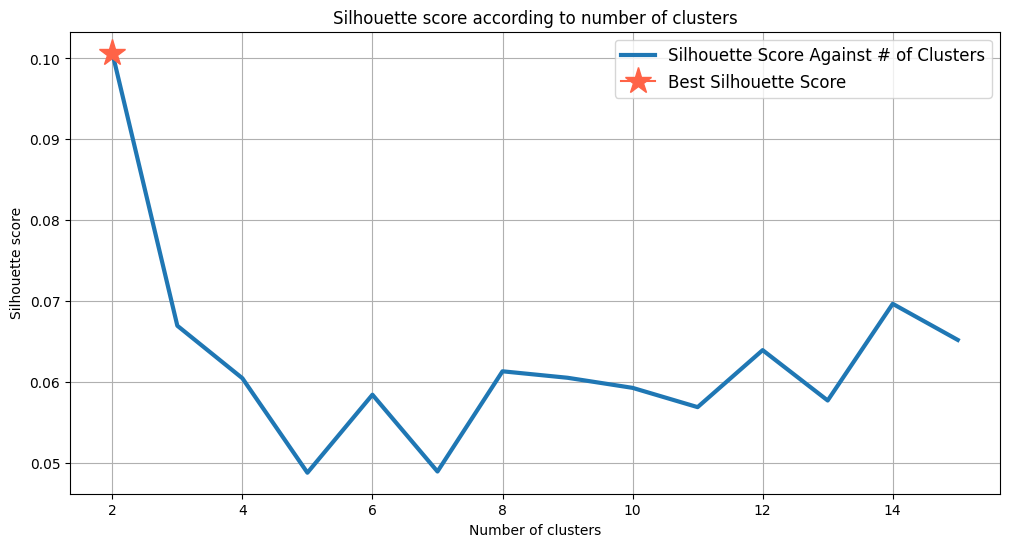

 Best Clustering corresponds to the following point :         Number of clusters = 2 & Silhouette_score = 0.10.


In [47]:
cols_=['Sepult','Periode_5_label','period_17_labels','Nb_actes','Mobilier','Nb_Mobilier','mob_tete',
 'mob_membre_inf','mob_thorax','mob_dos','mob_devant_corps','mob_contre_jarre','mob_dans_jarre',
 'mob_exterieur_coffre','mob_dans_coffre','mob_contre_paroi','mob_dans_remplissage','Signalisation',
 'pelle ','Ornement ','Nb_Ornement','orn_Porte','orn_Nonporte','Coquillage','Aspatharia_unio',
 'Perles','Fard','Outils','Prosterne','Decoupe','classe_age_0_1','classe_age_1_5','classe_age_5_10','classe_age_sup 12','Position_corps_Agenouille','Position_corps_Assis','Position_corps_D','Position_corps_Dos',
 'Position_corps_G','Position_corps_Ventre','Orientation_tete_E','Orientation_tete_N','Orientation_tete_NE',
 'Orientation_tete_NO','Orientation_tete_O','Orientation_tete_S','Orientation_tete_SE','Orientation_tete_SO',
 'Orientation_Face_Ciel','Orientation_Face_E','Orientation_Face_N','Orientation_Face_NE','Orientation_Face_NO',
 'Orientation_Face_O','Orientation_Face_S','Orientation_Face_SE','Orientation_Face_SO','Orientation_Face_Sol',
 'Orientation_Face_ciel','Orientation_Face_sol','Position_mains_Jambes','Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax','Position_mains_asymetrique_thorax_tete ','Position_mains_tete','Position_mains_thorax']
cols_to_use=['Nb_actes','Mobilier','Nb_Mobilier','mob_tete',
 'mob_membre_inf','mob_thorax','mob_dos','mob_devant_corps','mob_contre_jarre','mob_dans_jarre',
 'mob_exterieur_coffre','mob_dans_coffre','mob_contre_paroi','mob_dans_remplissage','Signalisation',
 'pelle ','Ornement ','Nb_Ornement','orn_Porte','orn_Nonporte','Coquillage','Aspatharia_unio',
 'Perles','Fard','Outils','Prosterne','Decoupe','classe_age_0_1','classe_age_1_5','classe_age_5_10','classe_age_sup 12','Position_corps_Agenouille','Position_corps_Assis','Position_corps_D','Position_corps_Dos',
 'Position_corps_G','Position_corps_Ventre','Orientation_tete_E','Orientation_tete_N','Orientation_tete_NE',
 'Orientation_tete_NO','Orientation_tete_O','Orientation_tete_S','Orientation_tete_SE','Orientation_tete_SO',
 'Orientation_Face_Ciel','Orientation_Face_E','Orientation_Face_N','Orientation_Face_NE','Orientation_Face_NO',
 'Orientation_Face_O','Orientation_Face_S','Orientation_Face_SE','Orientation_Face_SO','Orientation_Face_Sol',
 'Orientation_Face_ciel','Orientation_Face_sol','Position_mains_Jambes','Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax','Position_mains_asymetrique_thorax_tete ','Position_mains_tete','Position_mains_thorax']
data=data_encoded_Egypt_17[cols_]
Best_Clustering(data = data, scaling = False)

In [48]:
def generate_cluster_df(data_label, params):
    listid=[]
    listfamille_17=[]
    listfamille_5=[]
    listcluster=[]
    for j in range(params[0]): 
        for i in range(len(labeled_data)):
            size=len(labeled_data[0])-1
            if(labeled_data[i][size]==j):
                listid.append(labeled_data[i][0])
                listfamille_17.append(labeled_data[i][2])
                listfamille_5.append(labeled_data[i][1])
                listcluster.append(j)
    # initialize data of lists.
    data_ = {'id_sujet':listid ,
            'periode_temp_17': listfamille_17,
             'period_temp_5' : listfamille_5,
            'cluster':listcluster}
 
    # Create DataFrame
    df = pd.DataFrame(data_)
    
    return df

In [50]:
best_params, labeled_data= Best_Clustering(data = data, scaling = False,visualization = False )

In [51]:
data_cluster=generate_cluster_df(labeled_data,best_params)

In [52]:
data_cluster

,id_sujet,periode_temp_17,period_temp_5,cluster
0,480,0,1,0
1,494,0,1,0
2,498,2,0,0
3,508,16,0,0
4,510,2,0,0
...,...,...,...,...
310,983,0,1,1
311,994,0,1,1
312,997,4,2,1
313,998,4,2,1


In [53]:
#add clusters to the orginal data 
def addcluster(data_f, ids):
    list_cluster_ordred=[]
    for i in range(len(ids)):
        df=data_f.loc[data_f['id_sujet']==ids[i]]
        for index,row in df.iterrows():
            list_cluster_ordred.append(row['cluster'])
            
    return list_cluster_ordred 

In [54]:
ids=data['Sepult'].unique()
list_cluster=addcluster(data_cluster,ids)

In [55]:
data['cluster']=list_cluster

/var/folders/c9/wfdc2dh50mldzpv_7jpcnljr0000gn/T/ipykernel_6326/3578459800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=list_cluster


In [56]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
train_y=data['cluster']
data_train=data[cols_to_use]
clf.fit(data_train,train_y)

RandomForestClassifier()

In [57]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_train)
print('Expected Value:', explainer.expected_value)

/Users/chahrazedlabba/miniforge3/envs/IEEEtlt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Expected Value: [0.37101587 0.62898413]


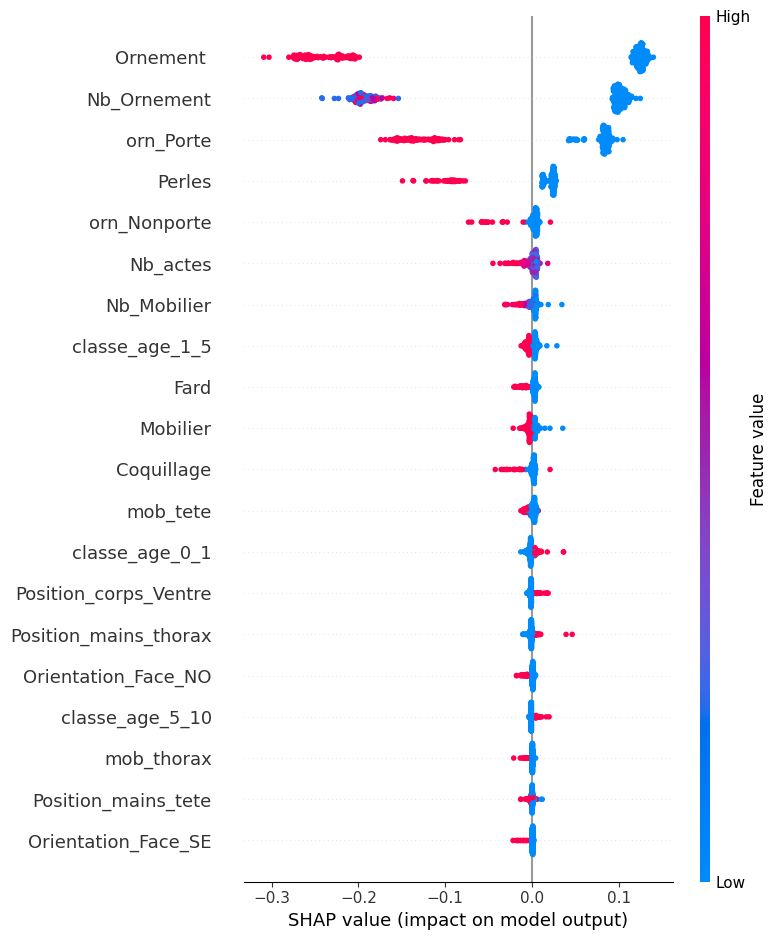

In [61]:
shap.initjs()
shap.summary_plot(shap_values[1], data_train)

In [60]:
data_cluster.to_csv('Egypt_Cluster_Data_315_V2.csv')